In [1]:
import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**PRELIMINARY DATA LOAD AND ANALYSIS**

In [0]:

# Data load of raw data.
data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Capstone/Input Data Synthetic.xlsx')




In [3]:

data.head()


,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [0]:
# Replacing spaces in column names with underscore for convinience
data.rename(columns = {'Assignment group':'Assignment_group'}, inplace = True) 
data.rename(columns = {'Short description':'Short_description'}, inplace = True) 

In [5]:
data.head()

,Short_description,Description,Caller,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [6]:
# Group Frequency Analysis shows groups data are highly skewed
data.Assignment_group.value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_67       1
GRP_73       1
GRP_70       1
GRP_64       1
GRP_61       1
Name: Assignment_group, Length: 74, dtype: int64

In [0]:
# converting target Variable Assignment_Group as categorical variable
data['target'] = data.Assignment_group.astype('category').cat.codes

In [8]:
data.head()

,Short_description,Description,Caller,Assignment_group,target
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,0


In [9]:
data.dtypes

Short_description    object
Description          object
Caller               object
Assignment_group     object
target                 int8
dtype: object

In [0]:
#num_class = len(np.unique(data.Assignment_group.values))
#y = data['target'].values

In [11]:
# Importing packages for nlp and plotting
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
import pandas as pd
import re
import warnings

#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
#from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:

data['Short_description'] = data['Short_description'].astype(str)

In [15]:
type(data['Short_description'])

pandas.core.series.Series

In [0]:
data_description = data.Short_description.values

In [17]:
print(data_description)

['login issue' 'outlook' 'cant log in to vpn' ...
 'vip2: windows password reset for tifpdchb pedxruyf'
 'machine nÃ£o estÃ¡ funcionando'
 'an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen. ']


**TERM FREQUENCY ANALYSIS OF TICKET DESCRIPTION**

In [18]:

#cv = # Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1, min_df=1, max_features=None)

# convert text data into term-frequency matrix
data_description = count_vec.fit_transform(data_description)




tfidf_transformer = TfidfTransformer()

# convert term-frequency matrix into tf-idf
tfidf_matrix = tfidf_transformer.fit_transform(data_description)

# create dictionary to find a tfidf word each word
word2tfidf = dict(zip(count_vec.get_feature_names(), tfidf_transformer.idf_))

for word, score in word2tfidf.items():
    print(word, score)

000010 9.354791902057414
00011418 9.354791902057414
0006475468 9.354791902057414
00064847 9.354791902057414
001 9.354791902057414
0043 9.354791902057414
00600 9.354791902057414
0088 9.354791902057414
00mesz 9.354791902057414
00pm 9.354791902057414
01447255 9.354791902057414
01453742 9.354791902057414
0158401519 9.354791902057414
0158921930 9.354791902057414
0159108934 9.354791902057414
0159108935 9.354791902057414
0159146993 9.354791902057414
02291 9.354791902057414
034 9.354791902057414
0372101858 9.354791902057414
04637 9.354791902057414
04os20400001808 9.354791902057414
04pm 9.354791902057414
0512667163 9.354791902057414
0512678028 9.354791902057414
0581144512 9.354791902057414
0581149834 9.354791902057414
06am 9.354791902057414
0819 9.354791902057414
082 9.354791902057414
0829 9.354791902057414
0830 9.354791902057414
08611 9.354791902057414
08am 9.354791902057414
092 9.354791902057414
0926 9.354791902057414
0sartlgeo 9.354791902057414
0x0 9.354791902057414
0x1233a6d28 9.35479190205

In [19]:

term_frequency = count_vec.vocabulary_
type(term_frequency)

dict

In [20]:
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
feature_names = np.array(count_vec.get_feature_names())
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

Features with lowest idf:
['000010' 'pladjmxt' 'placed' 'place' 'pix' 'pivot' 'pipfhypeu' 'pinto'
 'pinter' 'pinged']

Features with highest idf:
['fehlt' 'fehlende' 'fehl' 'feeder' 'feed' 'feathers' 'fduinmtw' 'fd37'
 'fehlgeschlagen' 'ˆï¼œè']


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


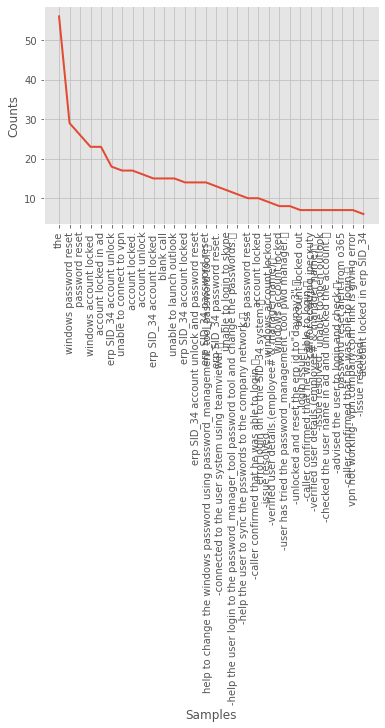

In [21]:
## Looking at frequency analysis of Short DEscription ( apart from the stop word The) gives clues about the classification topics
## expected by more formal analysis like LDA
count = nltk.FreqDist(data.Description.values)
count.plot(30)

In [0]:
final_doc = data['Description']
all_documents = tuple(final_doc)

**DOING DATA PREPROCESSING LIKE REMOVING STOP WORDS, LEMMATIZATION & STEMMING & PREPARING BAG OF WORDS CORPUS**.




In [24]:
reindexed_data= data["Short_description"]

data_text = data[['Short_description']]
data_text['index'] = data_text.index
documents=data_text


print(len(documents))
print(documents[:5])

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk


def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


8500
               Short_description  index
0                    login issue      0
1                        outlook      1
2             cant log in to vpn      2
3  unable to access hr_tool page      3
4                   skype error       4


In [25]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [26]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmer.stem('identified')


doc_sample = documents[documents['index'] == 5].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))


processed_docs = documents['Short_description'].map(preprocess)
processed_docs[:5]

original document: 
['unable', 'to', 'log', 'in', 'to', 'engineering', 'tool', 'and', 'skype']


 tokenized and lemmatized document: 
['unabl', 'engin', 'tool', 'skype']


0                     [login, issu]
1                         [outlook]
2                                []
3    [unabl, access, hr_tool, page]
4                    [skype, error]
Name: Short_description, dtype: object

In [27]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 issu
1 login
2 outlook
3 access
4 hr_tool
5 page
6 unabl
7 error
8 skype
9 engin
10 tool


In [28]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[123]

[(6, 1), (25, 1), (109, 1), (110, 1)]

In [29]:
#Preview Bag Of Words for our sample preprocessed document.
bow_doc_123 = bow_corpus[123]
for i in range(len(bow_doc_123)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_123[i][0], 
                                               dictionary[bow_doc_123[i][0]], 
bow_doc_123[i][1]))

Word 6 ("unabl") appears 1 time.
Word 25 ("report") appears 1 time.
Word 109 ("display") appears 1 time.
Word 110 ("expens") appears 1 time.


In [30]:
#TF-IDF
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.6374990442222483), (1, 0.7704511461577039)]


In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [32]:
# Print the results
import pickle

# Here we can assign topic names to each topic list, you can specify the number of words you want to have shown (e.g num_words = 5)
result = lda_model.print_topics(num_topics=5, num_words=5)
print(result)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[(0, '0.116*"sid_" + 0.100*"account" + 0.070*"lock" + 0.040*"job_schedul" + 0.039*"email"'), (1, '0.060*"work" + 0.052*"unabl" + 0.030*"connect" + 0.027*"issu" + 0.027*"compani"'), (2, '0.056*"issu" + 0.048*"hostname_" + 0.034*"error" + 0.032*"unabl" + 0.024*"outlook"'), (3, '0.130*"password" + 0.111*"reset" + 0.055*"access" + 0.039*"updat" + 0.038*"login"'), (4, '0.165*"job_schedul" + 0.116*"job_" + 0.101*"fail" + 0.076*"abend" + 0.033*"password"')]
Topic: 0 
Words: 0.116*"sid_" + 0.100*"account" + 0.070*"lock" + 0.040*"job_schedul" + 0.039*"email" + 0.038*"abend" + 0.035*"unlock" + 0.024*"issu" + 0.021*"window" + 0.020*"user"
Topic: 1 
Words: 0.060*"work" + 0.052*"unabl" + 0.030*"connect" + 0.027*"issu" + 0.027*"compani" + 0.025*"hostname_" + 0.025*"skype" + 0.024*"printer" + 0.017*"open" + 0.016*"tool"
Topic: 2 
Words: 0.056*"issu" + 0.048*"hostname_" + 0.034*"error" + 0.032*"unabl" + 0.024*"outlook" + 0.022*"mail" + 0.020*"setup" + 0.018*"product" + 0.018*"server" + 0.017*"number"


In [0]:
with open("lda_topics_result.txt", "w") as f:
    for s in result:
        f.write(str(s) +"\n")

In [35]:
!pip install -q openreview-py gensim pyLDAvis


     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 1.6MB 7.8MB/s 
     |████████████████████████████████| 256kB 17.1MB/s 
     |████████████████████████████████| 13.7MB 331kB/s 
     |████████████████████████████████| 28.9MB 105kB/s 
     |████████████████████████████████| 153kB 53.9MB/s 
     |████████████████████████████████| 552kB 47.9MB/s 
     |████████████████████████████████| 1.3MB 45.0MB/s 


**TOPIC MODELLING GROUPS BY LDA**

In [36]:
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(lda_model, bow_corpus,dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

In [0]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda_model.show_topic(i,25)) for i in range(5)}

In [38]:
import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(82, 5)
(5, 82)


In [39]:
df_lda

,sid_,account,lock,job_schedul,email,abend,unlock,issu,window,user,password,instal,cold,access,compani,error,login,internet,unabl,open,reset,get,outlook,hostname_,phone,work,connect,skype,printer,tool,ethic,activ,creat,laptop,applic,devic,employe,report,screen,attach,...,engin,print,mail,setup,product,server,number,defekt,process,messag,wrong,germani,check,order,file,hr_tool,receiv,updat,ticket,problem,network,outag,request,abl,ticket_no,inplant_,site,wifi,restor,manag,circuit,job_,fail,chang,nicht,help,etim,time,rechner,sampl
0,0.115957,0.100029,0.069505,0.040088,0.039356,0.038374,0.034903,0.024005,0.020909,0.020218,0.016805,0.015609,0.015435,0.014853,0.013396,0.011610,0.010448,0.009606,0.009193,0.008447,0.008430,0.008001,0.007767,0.007610,0.007343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.014917,0.000000,0.000000,0.000000,0.000000,0.000000,0.027192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027020,0.000000,0.000000,0.000000,0.051707,0.017491,0.000000,0.000000,0.000000,0.025118,0.000000,0.059789,0.030221,0.024970,0.023573,0.015906,0.014249,0.014098,0.013132,0.013012,0.012686,0.012628,0.012518,0.01248,0.012371,0.012334,...,0.010967,0.010743,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.013767,0.000000,0.000000,0.000000,0.000000,0.000000,0.056104,0.000000,0.012895,0.000000,0.000000,0.000000,0.000000,0.000000,0.034327,0.013964,0.000000,0.031759,0.000000,0.000000,0.000000,0.023938,0.048307,0.014115,0.000000,0.000000,0.015239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.021675,0.020381,0.01808,0.017779,0.017117,0.015674,0.015627,0.015421,0.013482,0.013287,0.012711,0.011343,0.011331,0.011314,0.011089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023143,0.010777,0.016900,0.130445,0.000000,0.000000,0.054667,0.012757,0.000000,0.037648,0.000000,0.029948,0.000000,0.110593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039111,0.030557,0.024821,0.019152,0.016611,0.016315,0.012742,0.012714,0.011702,0.011431,0.009277,0.007715,0.007612,0.007590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.012354,0.000000,0.000000,0.165085,0.000000,0.076169,0.000000,0.000000,0.007903,0.000000,0.032655,0.000000,0.000000,0.000000,0.013203,0.009508,0.008824,0.000000,0.017234,0.007921,0.010324,0.000000,0.030509,0.006923,0.000000,0.006471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007063,0.000000,

**CLUSTER MAPS SHOWS THE KEY WORDS IN THE TOPICS IDENTIFIED.THIS WILL BE USED FOR FURTHER ANALYSIS**.


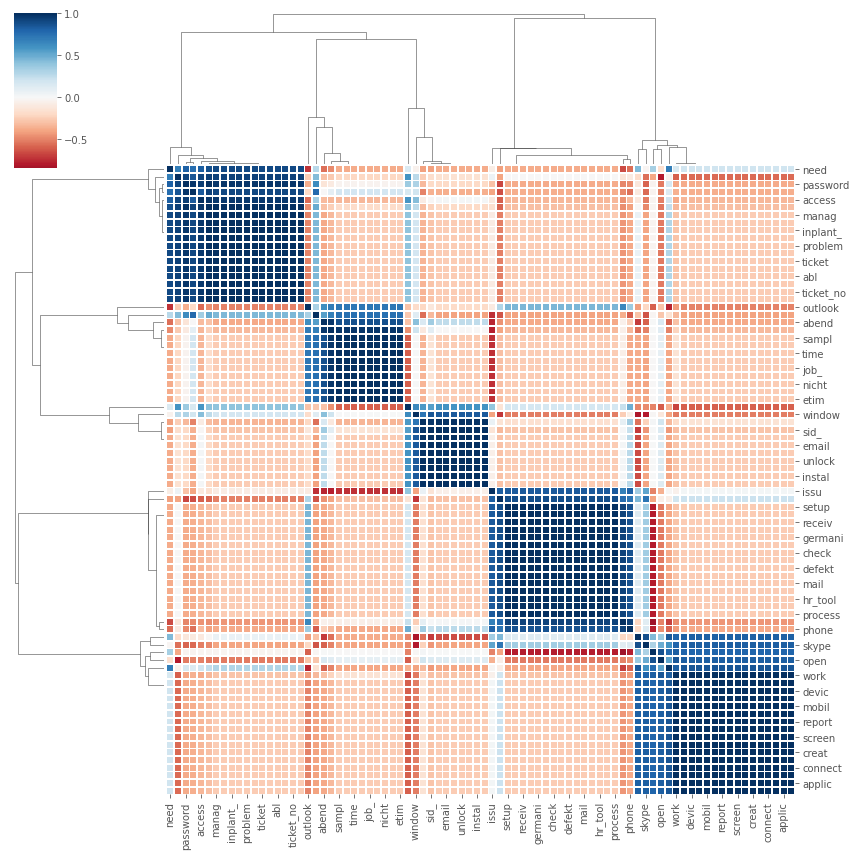

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

**MODELING WITH REVISED CLASSIFICATION**

In [0]:
##### THIS IS THE UPDATED TICKETS FILE HAVING REVISED GROUPS TAGGED BASED ON LDA INDENTIFIED GROUPS AND KEY WORKDS AS WELL
##### AS MANUAL ADJUSTMENT ( EXPLAINED IN XLS). APART FROM 5 GROUPS , THE OTHER LOW VOLUME LONG TAIL GROUPS HAVE BEEN MOVED TO
##### OTHERS GROUP FOR A TOTAL OF 6 GROUPS
data_revised = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Capstone/InputDataRevisedGroupTruncated.xlsx')

In [0]:

data_revised['Short_description'] = data_revised['Short_description'].astype(str)

In [0]:
data_revised.head()

,Short_description,Group
0,login issue,1
1,outlook,4
2,cant log in to vpn,1
3,unable to access hr_tool page,0
4,skype error,4


In [0]:

data_revised['target'] = data_revised.Group.astype('category').cat.codes

In [0]:
data_revised.head()

,Short_description,Group,target
0,login issue,1,1
1,outlook,4,4
2,cant log in to vpn,1,1
3,unable to access hr_tool page,0,0
4,skype error,4,4


In [0]:
data_revised.dtypes

Short_description    object
Group                 int64
target                 int8
dtype: object

In [0]:
data_revised.columns

Index(['Short_description', 'Group', 'target'], dtype='object')

In [0]:
data_revised['target'] = data_revised['Group'].factorize()[0]
from io import StringIO
category_id_df = data_revised[['Group', 'target']].drop_duplicates().sort_values('target')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['target', 'Group']].values)

In [0]:
data_revised.head()

,Short_description,Group,target
0,login issue,1,0
1,outlook,4,1
2,cant log in to vpn,1,0
3,unable to access hr_tool page,0,2
4,skype error,4,1


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(data_revised.Short_description).toarray()
labels = data_revised.target
features.shape

(8500, 2044)

In [0]:
####  AS SEEN, THE MOST CORRELATED UNIGARMS AND BIGRAMS WITH THE GROUPS RELATE WELL WITH THE VARIOUS GROUPS IDENTIFIED 

from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Group, target in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == target)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Group))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# '0':
  . Most correlated unigrams:
       . reset
       . password
  . Most correlated bigrams:
       . failed job_scheduler
       . password reset
# '1':
  . Most correlated unigrams:
       . reset
       . password
  . Most correlated bigrams:
       . unable login
       . password reset
# '2':
  . Most correlated unigrams:
       . job
       . job_scheduler
  . Most correlated bigrams:
       . job job_scheduler
       . failed job_scheduler
# '3':
  . Most correlated unigrams:
       . locked
       . account
  . Most correlated bigrams:
       . windows account
       . account locked
# '4':
  . Most correlated unigrams:
       . email
       . outlook
  . Most correlated bigrams:
       . outlook working
       . outlook issue
# '5':
  . Most correlated unigrams:
       . device
       . laptop
  . Most correlated bigrams:
       . device activation
       . mobile device


In [0]:

### FORMING TEST AND TRAINING DATA WITH VECTORIZED TEXT
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(data_revised['Short_description'], data_revised['Group'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [0]:
print(clf.predict(count_vect.transform(["My email is not working"])))

[4]


In [0]:
print(clf.predict(count_vect.transform(["I am locked out of my account and can't access"])))

[3]


In [0]:
print(clf.predict(count_vect.transform(["My laptop is not working"])))

[0]


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

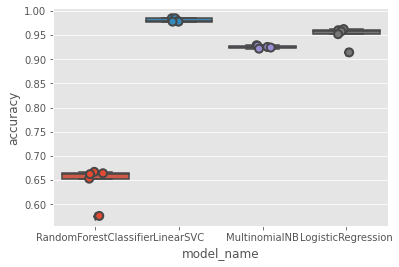

In [0]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [0]:
#### CLASSIFICATION MODELS SHOW HIGH ACCURACY OF LINEARSVC AND LOGISTIC REGRESSION
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.980706
LogisticRegression        0.949176
MultinomialNB             0.925529
RandomForestClassifier    0.644471
Name: accuracy, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data_revised.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

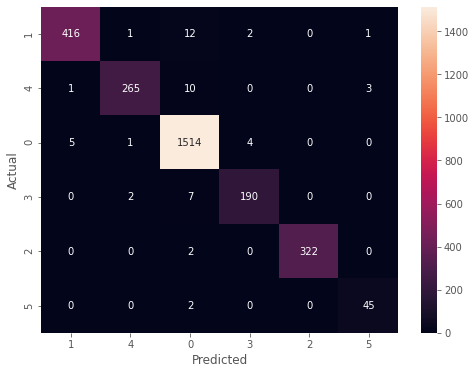

In [0]:
#### CONFUSION MATRIX OF LINEAR SVC SHOWS GOOD ALIGNMENT OF ACTUAL AND PREDICTED
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Group.values, yticklabels=category_id_df.Group.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [0]:
### ANALYSIS OF THE TOP WRONGLY PREDICTED GROUPS INDICATE THAT CONSIDERATION  OF FOREIGN LANGUAGES AND ADDITION OF SOME KEY WORDS
#### FOR CLASSIFICATION ( E.G. FIRMWARE FOR GROUP4) CAN HELP TUNE THE MODEL
from IPython.display import display
for predicted in category_id_df.Group:
  for actual in category_id_df.Group:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(data_revised.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Group', 'Short_description']])
      print('')

'4' predicted as '0' : 10 examples.


,Group,Short_description
5341,4,firmware upgrade on the phones
8270,4,å¯†ç æ›´æ”¹åŽï¼Œoutlookæ— æ³•ç™»é™†
276,4,outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...
456,4,primary telephone flow down - company EU - EU...
6706,4,skype connectivity is flickering: automaticall...
3987,4,keine anmeldung auf skype mÃ¶glich
5943,4,hr_tool site will not recognize email address ...
6747,4,please check josh's % in the phones
1712,4,outlooké‡å¤è¦æ±‚è¾“å…¥å¯†ç 
6596,4,the caller id display on users desk phone does...



'1' predicted as '0' : 12 examples.


,Group,Short_description
7019,1,need uasername and password of .telephony_sof...
4145,1,erp log in
6020,1,user wants to log in to infonet
406,1,hr_tool payroll sign in
7624,1,:i am getting the following message when tryin...
4265,1,erp log in issue
7874,1,engineering tool - permition to sign in - incl...
464,1,please setup user trhdaa2 back to startpasswor...
2311,1,seek support_network related issue.
976,1,fails to log in to erp and engineering tool



'3' predicted as '0' : 7 examples.


,Group,Short_description
8415,3,attendance_tool is not loading in internet exp...
5281,3,"""scghhnelligkeit"" meines internets plnvcwuq ik..."
779,3,collaboration_platform nicht verfÃ¼gbar - kein...
4123,3,kein internetsignal
2644,3,company distributor_tool is messed up. i enter...
256,3,pls also extend mm#7389861 & 7421988 to my pur...
4638,3,unlocked erp SID_34


In [0]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data_revised.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

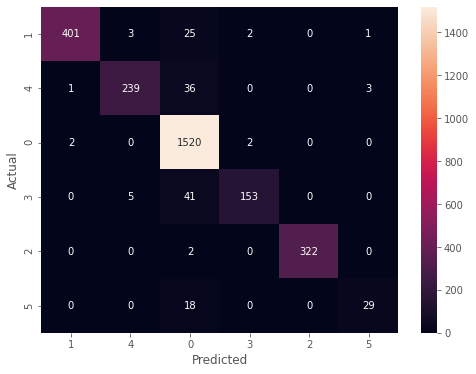

In [0]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Group.values, yticklabels=category_id_df.Group.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

model = MultinomialNB()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data_revised.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

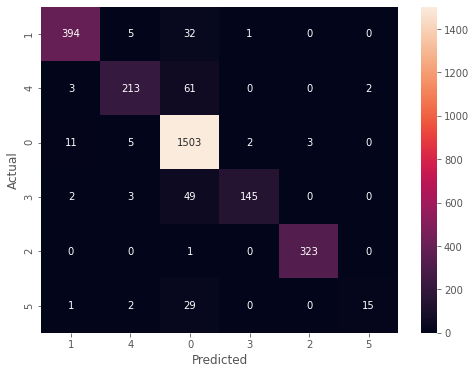

In [0]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Group.values, yticklabels=category_id_df.Group.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

model = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data_revised.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

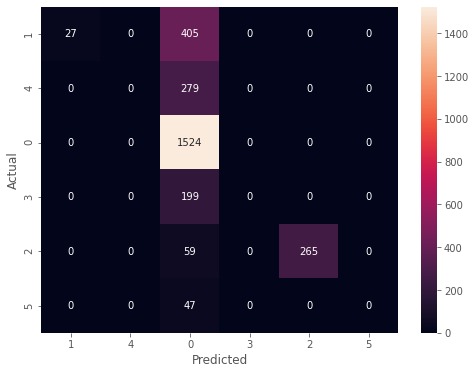

In [0]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Group.values, yticklabels=category_id_df.Group.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()